# Proyek Pertama: Predictive Analytics Saham Tesla (2010-2023)
Pendahuluan
Penjelasan Proyek: Notebook ini bertujuan untuk memprediksi harga saham Tesla (2010-2023) menggunakan teknik Predictive Analytics berbasis model Long Short-Term Memory (LSTM). Model ini dirancang untuk memanfaatkan data historis harga saham guna memprediksi harga di masa depan. Notebook ini mencakup berbagai tahap mulai dari eksplorasi data hingga evaluasi model.

Data set: https://www.kaggle.com/datasets/muhammadbilalhaneef/-tesla-stock-price-from-2010-to-2023?resource=download

## 1. Import Library
Pada bagian ini, kita mengimpor berbagai pustaka Python yang diperlukan untuk analisis data, visualisasi, machine learning, dan pembangunan model. Library seperti numpy, pandas, dan matplotlib digunakan untuk manipulasi data dan visualisasi. Library tensorflow.keras digunakan untuk membangun model LSTM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings

warnings.filterwarnings('ignore')

## 2. Load Dataset
Kita memuat dataset saham Tesla dari file CSV menggunakan pd.read_csv(). Setelah itu, kita memeriksa beberapa data teratas dengan df.head() untuk memahami struktur awal data.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/PredictiveAnalytics1_Saham-Tesla-2010-2023-/refs/heads/main/Tesla%20Stock%20Price%20(2010%20to%202023).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## 3. Data Understanding


#### a. Dimensi Dataset: "Kita memeriksa jumlah baris dan kolom dalam dataset menggunakan properti .shape."

In [3]:
# Dimensi dataset
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 3162 baris dan 7 kolom.


#### b. Tipe Data: "Informasi tentang tipe data tiap kolom diperiksa menggunakan df.info() untuk memastikan kompatibilitas dengan analisis selanjutnya."


In [4]:
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.0+ KB


#### c. Statistik Deskriptif: "Melakukan ringkasan statistik numerik menggunakan .describe() untuk melihat distribusi data.

In [5]:
# Statistik deskriptif
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


#### d. Ubah kolom Date ke Format Datetime

In [6]:
# Mengubah kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3162 non-null   datetime64[ns]
 1   Open       3162 non-null   float64       
 2   High       3162 non-null   float64       
 3   Low        3162 non-null   float64       
 4   Close      3162 non-null   float64       
 5   Adj Close  3162 non-null   float64       
 6   Volume     3162 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 173.0 KB


#### e. Visualisasi Data
Pergerakan harga penutupan saham Tesla divisualisasikan menggunakan line plot. Ini memberikan gambaran umum tentang pola harga saham selama periode waktu tertentu.

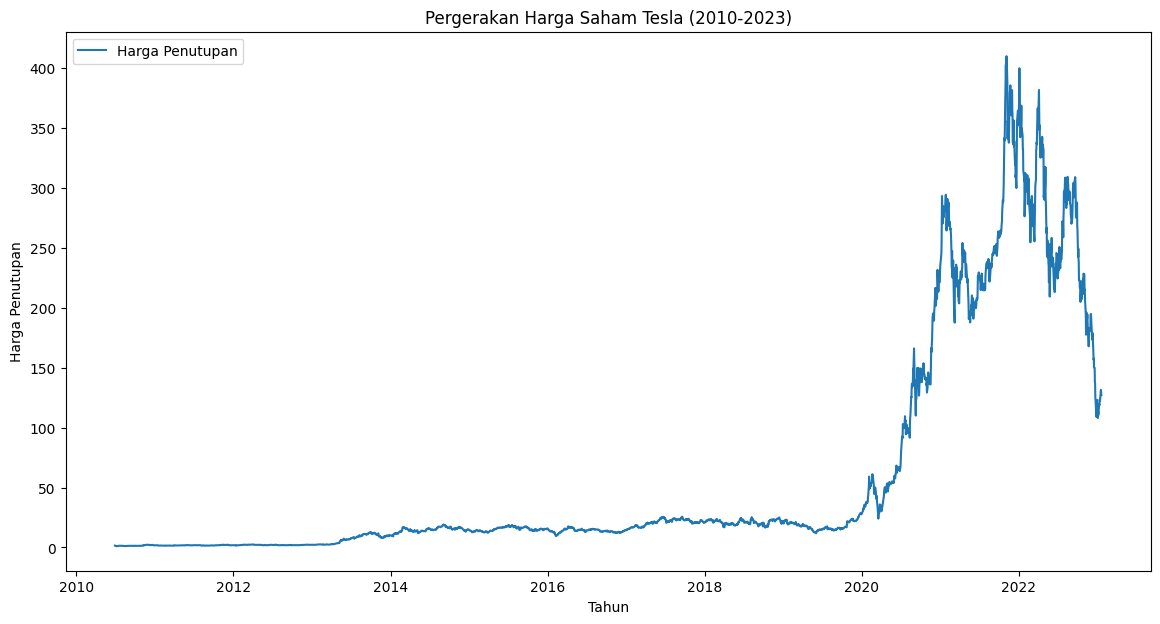

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Harga Penutupan')
plt.title('Pergerakan Harga Saham Tesla (2010-2023)')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

## 4. Data Preparation

#### a. Missing Values
Kita memeriksa apakah ada data yang hilang (missing values) di setiap kolom. Jika ada, metode forward fill digunakan untuk mengisi nilai yang hilang agar data tetap konsisten.

In [8]:
# Mengecek missing values
print("Jumlah missing values:")
print(df.isnull().sum())

# Mengisi missing values dengan metode forward fill
df.fillna(method='ffill', inplace=True)

Jumlah missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### b. Duplicate Data
Data duplikat diidentifikasi menggunakan df.duplicated().sum(). Jika ada duplikasi, kita menghapusnya dengan .drop_duplicates().

In [9]:
# Mengecek duplikasi
duplicates = df.duplicated().sum()
print(f"Terdapat {duplicates} data duplikat.")

# Jika ada, menghapus duplikasi
df = df.drop_duplicates()

Terdapat 0 data duplikat.


#### c. Normalisasi Data
Kolom Close dinormalisasi menggunakan MinMaxScaler agar nilainya berada dalam rentang 0-1. Ini bertujuan untuk meningkatkan performa model yang sensitif terhadap skala data.

In [10]:
# Normalisasi data kolom Close
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Menampilkan data yang telah dinormalisasi
scaled_data[:5]

array([[1.31893376e-03],
       [1.30915182e-03],
       [1.00428041e-03],
       [5.54310983e-04],
       [5.05408598e-05]])

#### d. Membuat Sequence Data
Kita membuat sequence data dengan panjang 60 untuk digunakan sebagai input model LSTM. Panjang ini berarti model akan menggunakan data harga penutupan 60 hari terakhir untuk memprediksi harga pada hari berikutnya.

In [11]:
# Fungsi untuk membuat sequence data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Parameter panjang sequence
seq_length = 60

# Membuat sequence data
X, y = create_sequences(scaled_data, seq_length)

# Melihat dimensi data hasil sequence
print(f"Dimensi X: {X.shape}, Dimensi y: {y.shape}")

Dimensi X: (3102, 60), Dimensi y: (3102,)


## 5. Preprocessing Data
#### a. Split Data
Dataset dibagi menjadi subset training (80%) dan testing (20%).

In [12]:
data = df[['Close']]
scaled_data = scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

#### b. Buat Sequence untuk Training dan Testing
Sequence data dibuat dari subset training dan testing.

In [13]:
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = X_train.reshape(-1, seq_length, 1)
X_test = X_test.reshape(-1, seq_length, 1)

## 6. Bangun Model LSTM
Kita membangun model LSTM menggunakan Sequential dari tensorflow.keras. Model ini memiliki dua lapisan LSTM dengan lapisan dropout untuk mencegah overfitting, serta dua lapisan Dense untuk menghasilkan output akhir berupa prediksi harga.

In [14]:
# Bangun model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 3.7128e-04 - val_loss: 0.0100
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 4.0242e-05 - val_loss: 0.0073
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 8.2961e-05 - val_loss: 0.0106
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.7117e-05 - val_loss: 0.0118
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 2.9333e-05 - val_loss: 0.0023
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.2392e-05 - val_loss: 0.0026
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.2829e-05 - val_loss: 0.0053
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 2.4993e-05 - val_loss: 0.0060
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.7392e-05 - val_loss: 0.0099
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.7192e-05 - val_loss: 0.0136
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 2.6049e-05 - val_loss: 0.0061
Epoch 12/50
78/78 ━

## 7. Evaluasi dan Prediksi
Kita mengevaluasi performa model dengan menghitung Root Mean Squared Error (RMSE), yang memberikan metrik seberapa baik model dapat memprediksi harga saham dibandingkan data aktual.

In [15]:
# Prediksi menggunakan data testing
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Balikkan skala ke bentuk asli

# Balikkan skala y_test ke bentuk asli
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluasi dengan RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Root Mean Squared Error (RMSE): 30.095818943937743


## 8. Visualisasi Hasil
Hasil prediksi dibandingkan dengan harga aktual menggunakan grafik untuk melihat sejauh mana model mampu mengikuti pola harga saham.

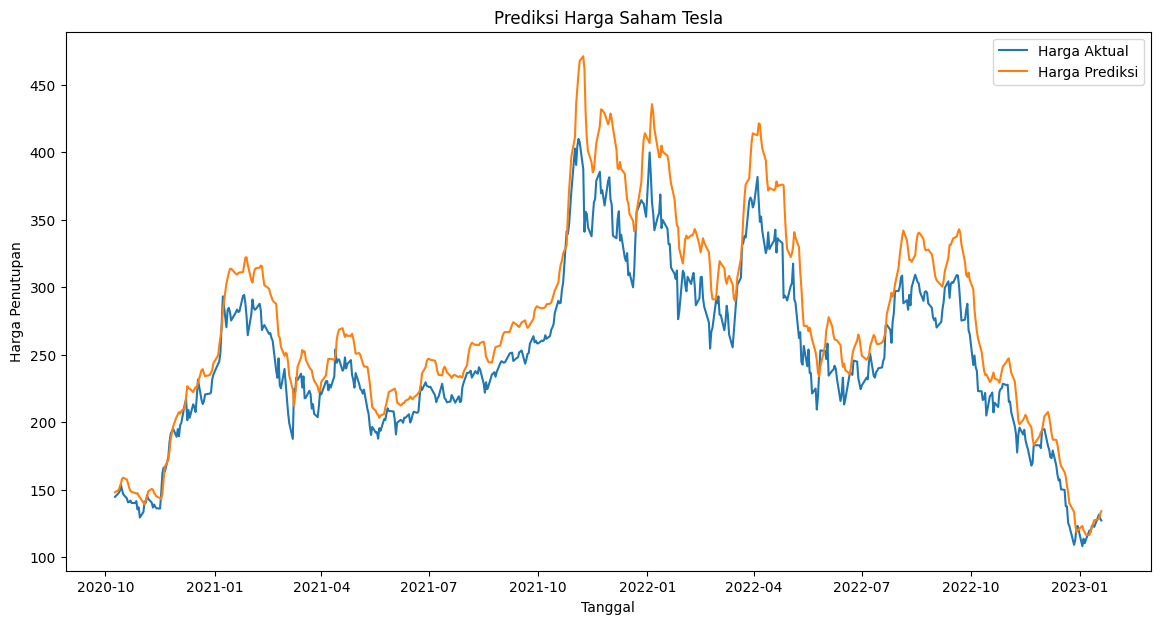

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'][-len(y_test):], y_test_actual, label='Harga Aktual')
plt.plot(df['Date'][-len(y_test):], predictions, label='Harga Prediksi')
plt.title('Prediksi Harga Saham Tesla')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()